In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\HP\Documents\GitHub\personal_doc_consultant\data\raw\Community Healthcare MultiSymptomsDisease Diagnostic Dataset.csv')

In [3]:
df.head()

,disease,symptom_cough,symptom_dry_cough,symptom_productive_cough,symptom_shortness_of_breath,symptom_wheezing,symptom_chest_tightness,symptom_sore_throat,symptom_runny_nose,symptom_nasal_congestion,...,rare_symptom_tall_stature_rare,rare_symptom_hyperextensible_skin_rare,rare_symptom_joint_hypermobility_rare,rare_symptom_macroglossia_rare,rare_symptom_hearing_loss_early_onset_rare,rare_symptom_developmental_delay_rare,rare_symptom_proximal_muscle_weakness_rare,rare_symptom_bulbar_symptoms_rare,rare_symptom_respiratory_failure_rare,rare_symptom_renal_cysts_rare
0,Hyperthyroidism,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coronary_Artery_Disease,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Irritable_Bowel_Syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Irritable_Bowel_Syndrome,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Obesity,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df2=pd.read_csv(r'C:\Users\HP\Documents\GitHub\personal_doc_consultant\data\knowledge\perdoc2_specific_filled.csv')

In [5]:
df2.head()

,disease,discription,causes,remedy
0,Acute_Gastroenteritis,Sudden inflammation of stomach and intestines ...,"Commonly caused by rotavirus, norovirus, conta...","Rehydration therapy, electrolyte replacement, ..."
1,Amyotrophic_Lateral_Sclerosis,Progressive degeneration of motor neurons lead...,Mostly idiopathic; some cases linked to SOD1 o...,"Riluzole, edaravone, respiratory support, phys..."
2,Asthma,"Chronic airway inflammation causing wheezing, ...","Allergens, pollution, exercise, respiratory in...","Inhaled corticosteroids, bronchodilators, trig..."
3,Chronic_Kidney_Disease,Progressive loss of kidney function affecting ...,"Diabetes, hypertension, glomerulonephritis, po...","Blood pressure control, glucose control, dialy..."
4,Chronic_Liver_Disease,Long‑term liver damage causing fibrosis and im...,"Alcohol abuse, hepatitis B/C, fatty liver dise...","Avoid alcohol, antiviral therapy, weight loss,..."


In [6]:
print(df.shape, df.dtypes.head())
print(df['disease'].value_counts().head())

(100000, 175) disease                        object
symptom_cough                   int64
symptom_dry_cough               int64
symptom_productive_cough        int64
symptom_shortness_of_breath     int64
dtype: object
disease
Asthma                      21295
Hyperthyroidism             10747
Irritable_Bowel_Syndrome     9023
Obesity                      7853
Pneumonia                    6493
Name: count, dtype: int64


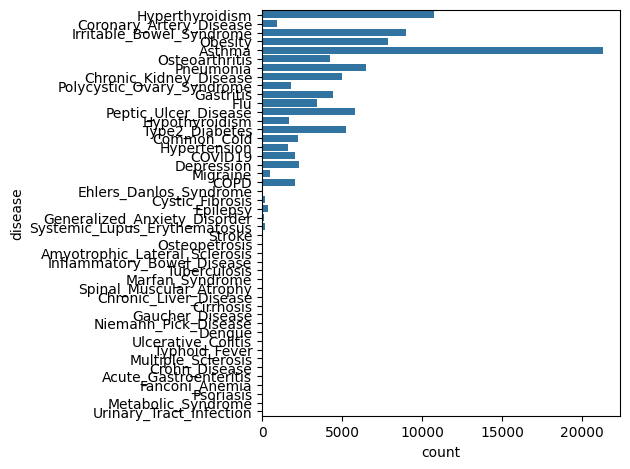

In [7]:
import seaborn as sns, matplotlib.pyplot as plt

sns.countplot(y=df['disease'])
plt.tight_layout(); plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['disease'])
y = df['disease']

# Filter out classes with < 2 samples
counts = y.value_counts()
keep_labels = counts[counts >= 2].index
mask = y.isin(keep_labels)

X_clean = X[mask]
y_clean = y[mask]

# Stratified split now works
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42
)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

num_cols = X.select_dtypes(include='number').columns

preprocess = ColumnTransformer(
    transformers=[('num', StandardScaler(with_mean=False), num_cols)],
    remainder='passthrough'
)

rf_pipe = Pipeline([
    ('prep', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=400, class_weight='balanced', random_state=42
    ))
])

In [12]:
rf_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse mat

In [15]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

lgb = LGBMClassifier(
    n_estimators=200, learning_rate=0.05, class_weight='balanced', random_state=42
)

params = {
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 40],
    'feature_fraction': [0.7, 0.9, 1.0],
    'bagging_fraction': [0.7, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    lgb, params, n_iter=8, cv=cv, n_jobs=-1, scoring='f1_macro'
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

c:\Users\HP\Documents\GitHub\personal_doc_consultant\venv\Lib\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 79999, number of used features: 174
[LightGBM] [Info] Start training from score -3.806662
[LightGBM] [Info] Start training from score -3.806662
[LightGBM] [Info] Start training from score -3.806662
[Li

In [18]:
import joblib
joblib.dump(best_model, r"C:\Users\HP\Documents\GitHub\personal_doc_consultant\models\model.joblib")

['C:\\Users\\HP\\Documents\\GitHub\\personal_doc_consultant\\models\\model.joblib']

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
                               precision    recall  f1-score   support

        Acute_Gastroenteritis       0.00      0.00      0.00         1
Amyotrophic_Lateral_Sclerosis       0.35      0.60      0.44        10
                       Asthma       0.86      0.52      0.65      4259
                         COPD       0.43      0.68      0.53       412
                      COVID19       0.40      0.62      0.49       407
       Chronic_Kidney_Disease       0.60      0.65      0.62       999
        Chronic_Liver_Disease       0.00      0.00      0.00         1
                    Cirrhosis       0.00      0.00      0.00         4
                  Common_Cold       0.46      0.67      0.55       447
      Coronary_Artery_Disease       0.37      0.

c:\Users\HP\Documents\GitHub\personal_doc_consultant\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\Documents\GitHub\personal_doc_consultant\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\Documents\GitHub\personal_doc_consultant\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [20]:
import numpy as np
proba = best_model.predict_proba(X_test)
labels = best_model.classes_
top3_idx = np.argsort(proba, axis=1)[:, -3:][:, ::-1]
top3 = [[(labels[j], float(proba[i][j])) for j in row] for i, row in enumerate(top3_idx)]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9


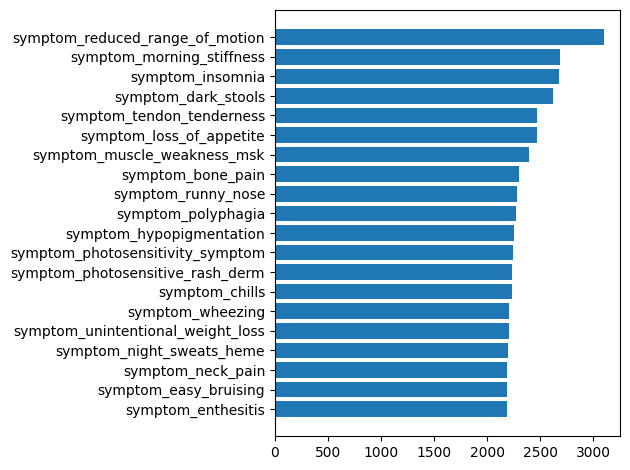

In [21]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_model.feature_importances_
idx = np.argsort(importances)[-20:][::-1]
plt.barh(np.array(X.columns)[idx], importances[idx])
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

c:\Users\HP\Documents\GitHub\personal_doc_consultant\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


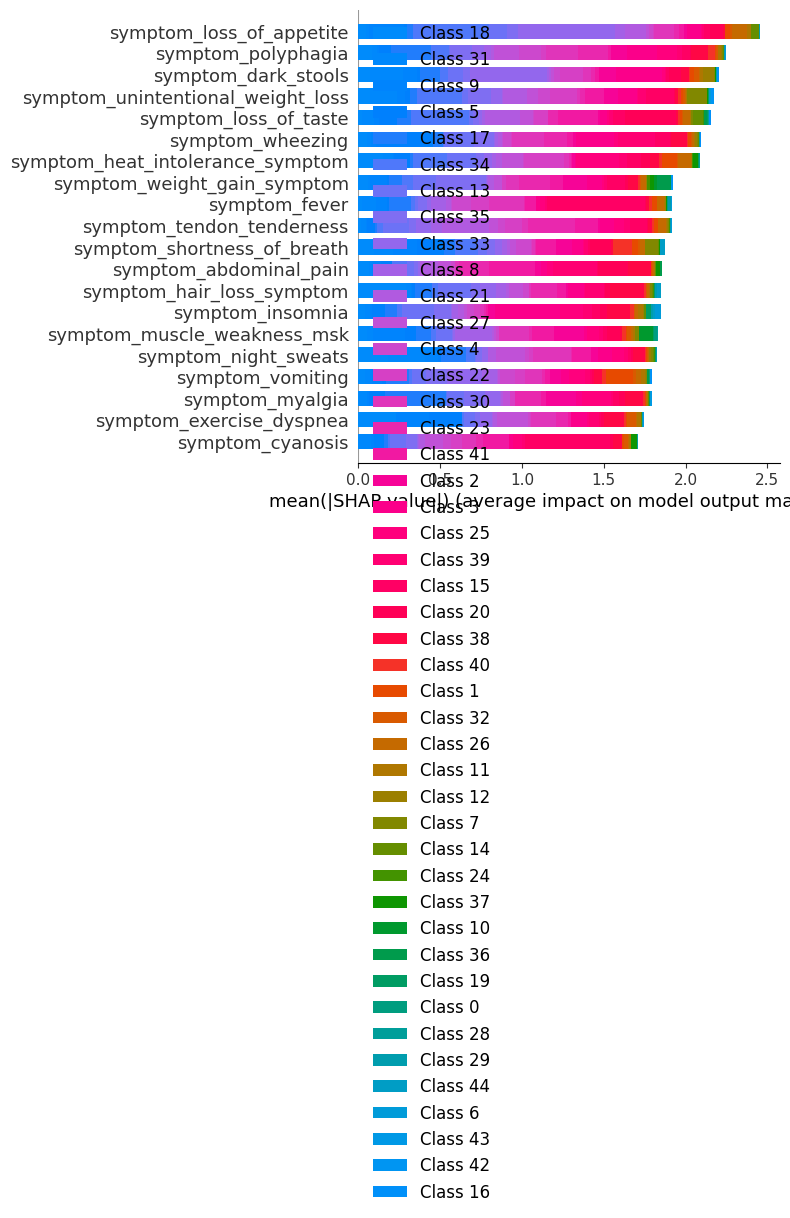

In [23]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [24]:
info = pd.read_csv(r"C:\Users\HP\Documents\GitHub\personal_doc_consultant\data\knowledge\perdoc2_specific_filled.csv").set_index('disease')


In [26]:
pred_label = best_model.predict(X_test.iloc[[0]])[0]
details = info.loc[pred_label, ['discription','causes','remedy']].to_dict()

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
